In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline,make_pipeline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

In [5]:
df3 = pd.read_csv('Disease_symptom_and_patient_profile_dataset1.csv')

In [6]:
# How big is the data?
df3.shape

(349, 10)

In [7]:
# How does the data look like?
# df3.sample(10)
df3.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [8]:
# What is the data type of cols?
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [9]:
# Are there any missing values?
df3.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [10]:
# How does the data look mathematically?
df3.describe()
# df4.describe()


,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [11]:
# Are there duplicate values?
df3.duplicated().sum()


49

In [12]:
# How to remove duplicated?
df3=df3.drop_duplicates()
df5=df3.drop_duplicates()
# df4=df5

In [13]:
df5.duplicated().sum()

0

In [14]:
# How is the correlation between cols?
# pandas functions
# df3['Disease'].value_counts().head().plot(kind='bar')
myseries=df3['Disease'].value_counts()
# myseries['Chickenpox']
# df3['Disease'].value_counts().sort_values(ascending=False)

# df3.sort_values('Age',ascending=False)
df3.drop_duplicates(subset=['Disease']).shape


# pivot table
# df5.pivot_table(index=['Disease','Gender'], columns='Age', values='Outcome Variable')

(116, 10)

In [15]:
df4=df5
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Low','Normal','High'],['Low','Normal','High']],handle_unknown='error')
oe=OrdinalEncoder()
df4[['Blood Pressure','Cholesterol Level']]=oe.fit_transform(df4[['Blood Pressure','Cholesterol Level']])


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4['Outcome Variable']=le.fit_transform(df4['Outcome Variable'])
df4['Cough']=le.fit_transform(df4['Cough'])
df4['Fatigue']=le.fit_transform(df4['Fatigue'])
df4['Difficulty Breathing']=le.fit_transform(df4['Difficulty Breathing'])
df4['Fever']=le.fit_transform(df4['Fever'])
# df4['Disease']=le.fit_transform(df4['Disease'])

ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')
df4['Disease']=ohe.fit_transform(df4['Disease'].values.reshape(-1, 1))
df4['Gender']=ohe.fit_transform(df4['Gender'].values.reshape(-1, 1))

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
X1=df4.iloc[:,0:9]

In [22]:
y1=df4.iloc[:,-1]


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.1)

NameError: name 'y1' is not defined

In [22]:
y_train

282    0
86     1
186    1
165    0
18     1
      ..
214    0
196    1
39     1
311    1
233    1
Name: Outcome Variable, Length: 270, dtype: int32

Outcome Variable
Positive    157
Negative    143
Name: count, dtype: int64

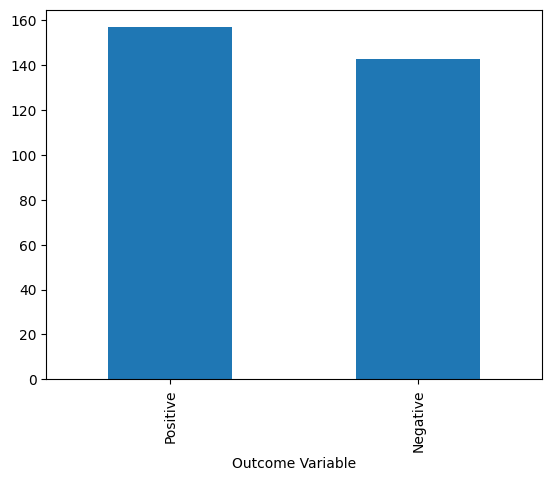

In [58]:
# EDA using Univariate analysis
# Categorical Data
# Countplot will give you frequency of cat column

# sns.countplot(df3['Outcome Variable'])
df3['Outcome Variable'].value_counts().plot(kind='bar')
df3['Outcome Variable'].value_counts()

<Axes: ylabel='count'>

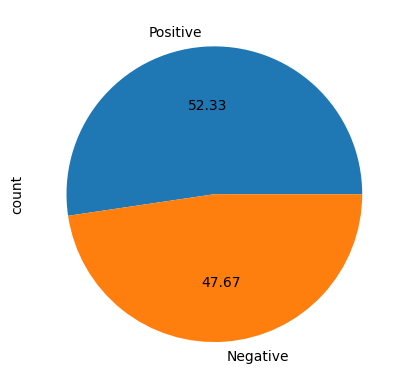

In [178]:
# # B Piechart
df3['Outcome Variable'].value_counts().plot(kind='pie', autopct='%.2f')

(array([ 6., 43., 77., 52., 35., 52., 19., 13.,  1.,  2.]),
 array([19. , 26.1, 33.2, 40.3, 47.4, 54.5, 61.6, 68.7, 75.8, 82.9, 90. ]),
 <BarContainer object of 10 artists>)

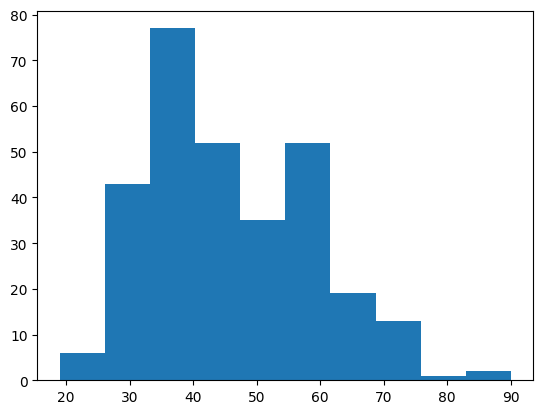

In [59]:
# # Numerical Data
# # a.Histogram:distribution of data get to know workin with bins
# import matplotlib.pyplot as plt
plt.hist(df3['Age'],bins=10)

C:\Users\Pranita\AppData\Local\Temp\ipykernel_13136\534079916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Age'])


<Axes: xlabel='Age', ylabel='Density'>

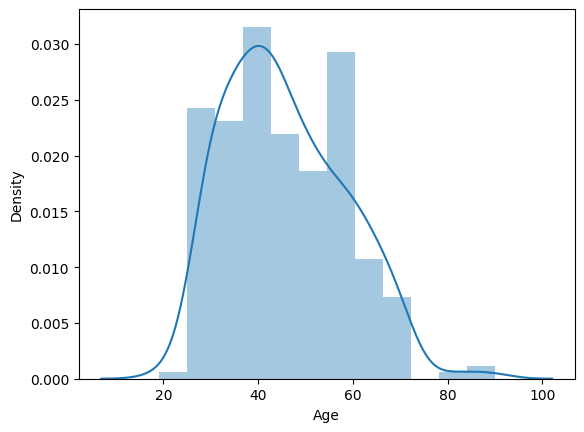

In [50]:
sns.distplot(df4['Age'])
# kde kernal density estimation
# Data ka distribution Probability (y-axis)Density funtion
# Sknewness of your data  pandas function

<Axes: ylabel='Age'>

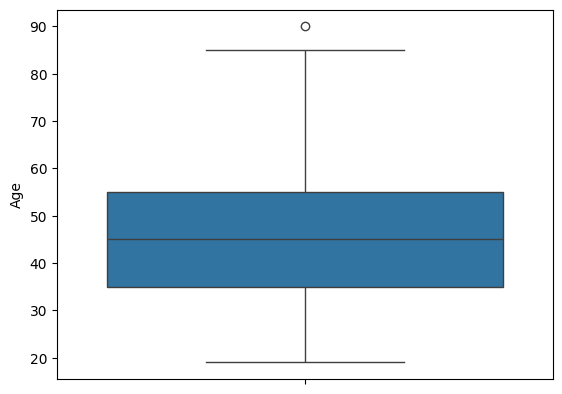

In [60]:
# Boxplot will give five number summary
sns.boxplot(df4['Age'])

In [62]:
df5['Age'].min()

19

In [63]:
df5['Age'].max()

90

In [64]:
df5['Age'].mean()

45.75666666666667

In [65]:
# 0 means perfectly skew, +ve number means positively skew towards right side,-ve number means Negatively skewed towards left side
df5['Age'].skew()

0.5182644329109131

In [66]:
df5['Fever'].value_counts()

Fever
0    157
1    143
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Disease'>

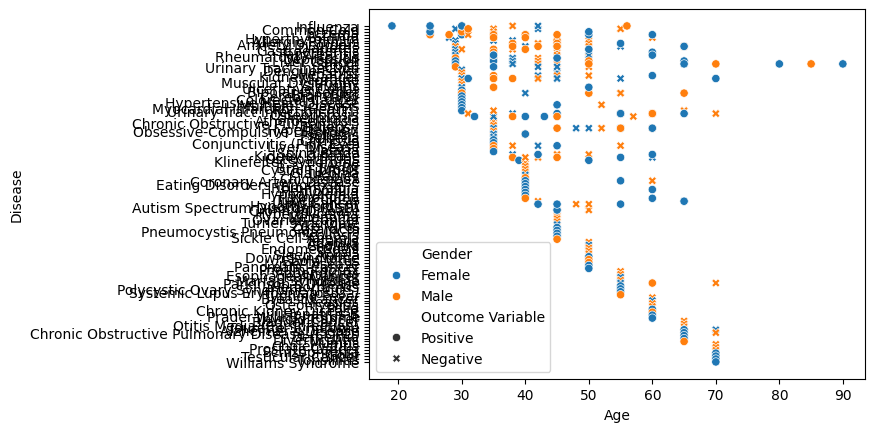

In [217]:
# EDA using Bivariate and Multivariate analysis
# scatterplot on Numerical-Numerical
sns.scatterplot(data=df3,x='Age',y='Disease',hue='Gender',style='Outcome Variable')

<Axes: xlabel='Blood Pressure', ylabel='Age'>

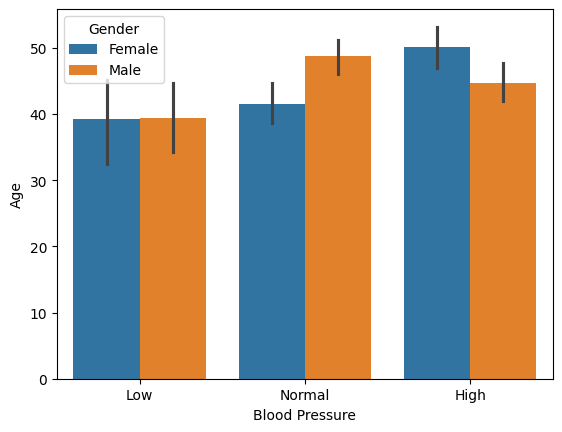

In [67]:
# 2.Bar plot(Numerical-Categorical)
sns.barplot(data=df3,x='Blood Pressure',y='Age',hue='Gender')

<Axes: xlabel='Gender', ylabel='Age'>

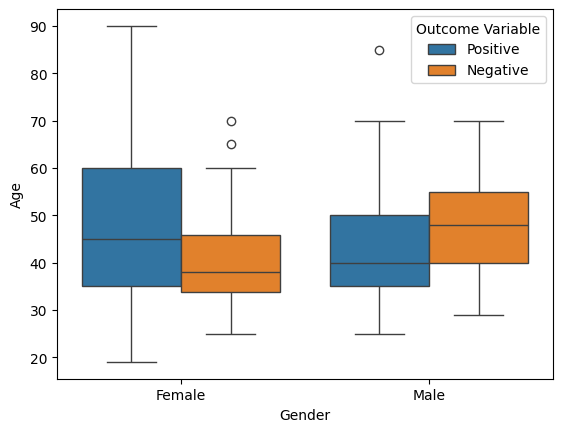

In [68]:
# Box plot(Numerical-categorical)
sns.boxplot(data=df3,x='Gender',y='Age',hue='Outcome Variable')

C:\Users\Pranita\AppData\Local\Temp\ipykernel_16824\241375872.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Outcome Variable']=='Negative']['Age'],hist=False)
C:\Users\Pranita\AppData\Local\Temp\ipykernel_16824\241375872.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

<Axes: xlabel='Age', ylabel='Density'>

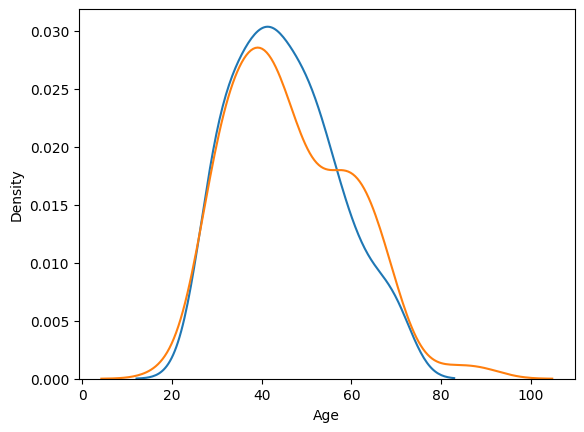

In [71]:
# Distplot(Numerical-categorical)
sns.distplot(df3[df3['Outcome Variable']=='Negative']['Age'],hist=False)
sns.distplot(df3[df3['Outcome Variable']=='Positive']['Age'],hist=False)


<Axes: xlabel='Outcome Variable', ylabel='Blood Pressure'>

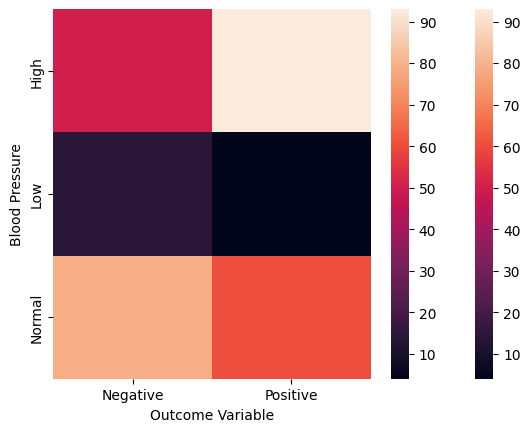

In [76]:
# 5.HeatMap(Categorical-Categorical)
pd.crosstab(df3['Blood Pressure'],df3['Outcome Variable'])
sns.heatmap(pd.crosstab(df3['Blood Pressure'],df3['Outcome Variable']))
sns.heatmap(pd.crosstab(df3['Blood Pressure'],df3['Outcome Variable']))


In [82]:
# percentage wise how many people are positive and negative using groupby function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df5['OV']=le.fit_transform(df5['Outcome Variable'])
df5.groupby('Blood Pressure')['OV'].mean()*100
# (df5.groupby('Blood Pressure')['OV'].mean()*100).plot(kind='bar')

Blood Pressure
0.0    65.034965
1.0    22.222222
2.0    43.165468
Name: OV, dtype: float64

In [229]:
disease=df3.groupby('Disease')
# # find top 3 disease people suffered the most
# df5.groupby('Disease').sum()['OV'].sort_values(ascending=False).head(3)
# disease.max()

In [32]:
# Another way of finding top 3 disease 
df5.groupby('Fever')['OV'].sum().sort_values(ascending=False)

Fever
1    88
0    69
Name: OV, dtype: int64

In [267]:
diseases=df3.groupby('Disease')
diseases
len(df3)
len(diseases)
diseases.size().sort_values(ascending=False)

Disease
Asthma                            16
Osteoporosis                      12
Stroke                            11
Diabetes                          10
Migraine                          10
                                  ..
Epilepsy                           1
Endometriosis                      1
Ebola Virus                        1
Eating Disorders (Anorexia,...     1
Zika Virus                         1
Length: 116, dtype: int64

In [268]:
diseases.groups
df3.iloc[112,:]

Disease                 Chickenpox
Fever                           No
Cough                          Yes
Fatigue                         No
Difficulty Breathing            No
Age                             40
Gender                        Male
Blood Pressure              Normal
Cholesterol Level             High
Outcome Variable          Positive
Name: 127, dtype: object

In [269]:
diseases.get_group('Allergic Rhinitis')

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
11,Allergic Rhinitis,No,Yes,Yes,No,29,Female,Normal,Low,Negative
55,Allergic Rhinitis,No,No,Yes,No,35,Female,Normal,Low,Negative
97,Allergic Rhinitis,No,Yes,No,No,38,Female,Low,Normal,Negative
160,Allergic Rhinitis,No,Yes,Yes,No,45,Male,High,Normal,Negative
179,Allergic Rhinitis,Yes,Yes,Yes,No,45,Male,High,Normal,Positive
205,Allergic Rhinitis,Yes,No,No,No,50,Male,High,High,Negative


In [292]:
# total number of positive and negaive
mask = df3['Outcome Variable']=='Negative'
new_df3=df3[mask]


In [293]:
new_df3.shape[0]

143

In [304]:
# Maximum number of patients who are positive to disease comes under which age group (top 5 age group)
new_df3.groupby('Age')['Outcome Variable'].count().sort_values(ascending=False).head(5)

Age
50    18
35    17
45    16
55    13
42    12
Name: Outcome Variable, dtype: int64

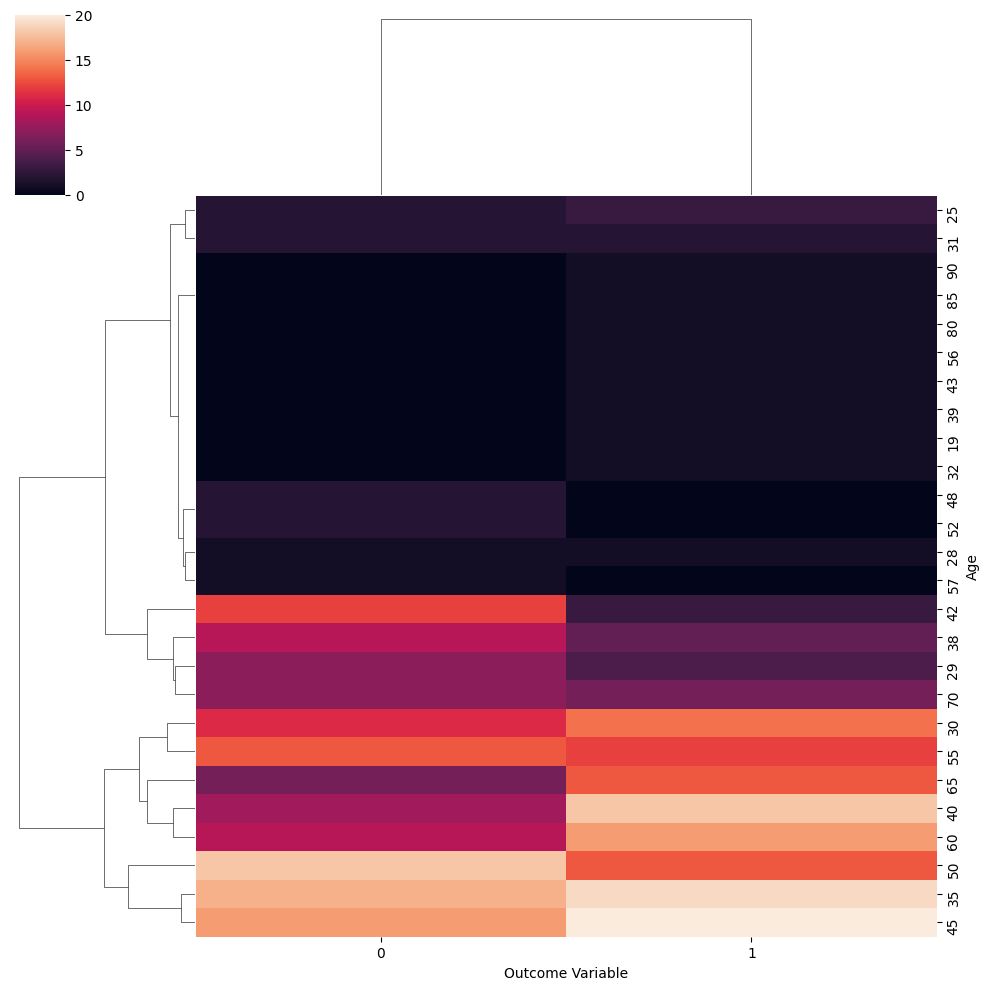

In [33]:
# clustermap Categorical -categorical
pd.crosstab(df5['Age'],df5['Outcome Variable'])
sns.clustermap(pd.crosstab(df5['Age'],df5['Outcome Variable']))
# clustermap shows closeness between valuse,this are the dendograms captures hirarchi relation give extra information about your data 



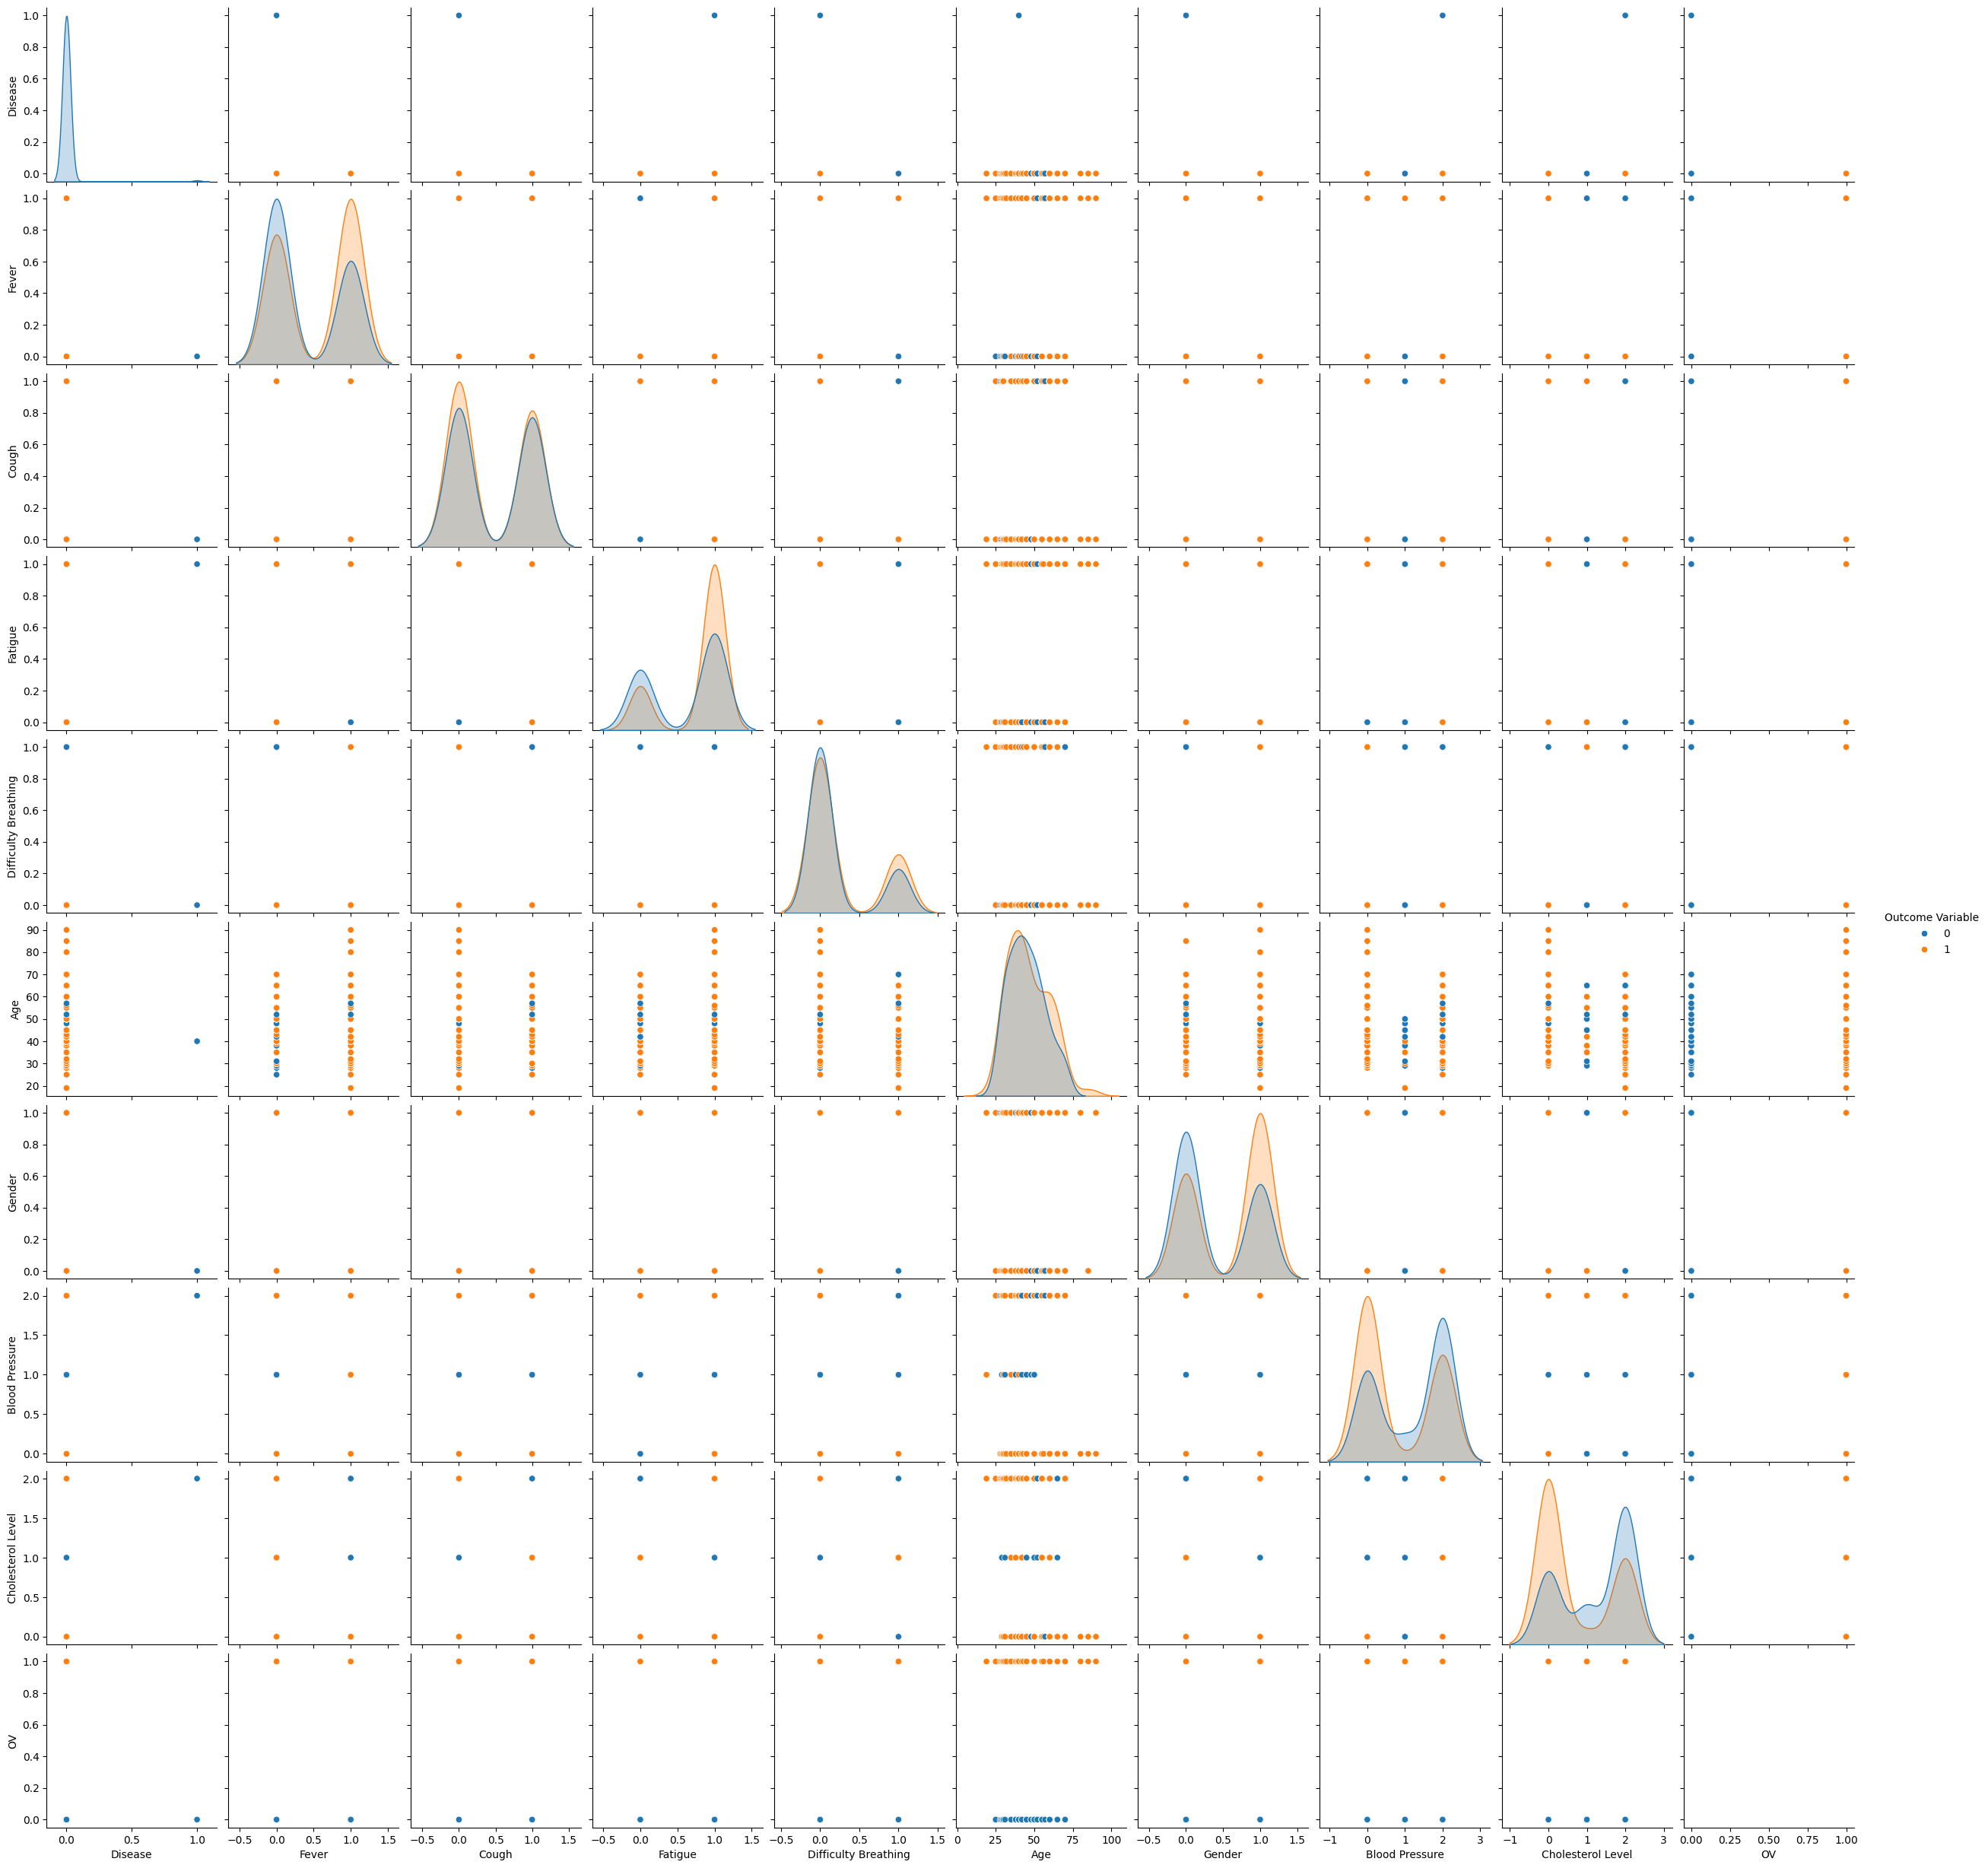

In [34]:
# paiplot, collection of scatterplot of numerical column in your data
sns.pairplot(df4,hue='Outcome Variable')
    

In [ ]:
# # Pandas profiling
# !pip install pandas-profiling

In [ ]:
# from pydantic_settings import BaseSettings
# !pip install -U pydantic

In [ ]:
# from pandas_profiling import ProfileReport
# prof= ProfileReport(df5)
# prof.to_file(output_file='output.

In [25]:
# Using Pipeline
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df3.drop(columns=['Outcome Variable']),df3['Outcome Variable'], 
                                                test_size=0.2,random_state=42)

In [66]:
# X_train.head()

In [26]:
#Ordinal Encoding
trf1=ColumnTransformer([
    ('Ord_en',OrdinalEncoder(categories=[['Low','Normal','High'],['Low','Normal','High']]),[7,8])
],remainder='passthrough')
    

In [27]:
#One hot encoding
trf2=ColumnTransformer([
    ('Ohe_all',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,3,4,6])
],remainder='passthrough')

In [69]:
# # Label encoding
# trf3=ColumnTransformer([
#     ('Le_enc',LabelEncoder(),[1,2,3,4])
# ],remainder='passthrough')

In [28]:
# Scaling
trf3=ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [29]:
#Feature selecction
trf4=SelectKBest(score_func=chi2,k=5)

In [30]:
# train the model
trf5=DecisionTreeClassifier()


In [31]:
# Create Pipeling
pipe1=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [32]:
#train the model
pipe1.fit(X_train,y_train)

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ord_en',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'High'],
                                                                             ['Low',
                                                                              'Normal',
                                                                              'High']]),
                                                  [7, 8])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_all',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 4, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x000001C918DF5D00>)),
                ('trf5', DecisionTreeClassifier())])

In [33]:
#Display pipeline
from sklearn import set_config
set_config(display='diagram')

In [34]:
#Predict
y_pred = pipe1.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6166666666666667

In [37]:
# Cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe1,X_train,y_train,cv=5, scoring='accuracy').mean()

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

0.6583333333333333

In [47]:
# Explore the pipeline
pipe1.named_steps['trf1'].transformers_



[('Ord_en',
  OrdinalEncoder(categories=[['Low', 'Normal', 'High'],
                             ['Low', 'Normal', 'High']]),
  [7, 8]),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5, 6])]

In [48]:
# GridSearch using Pipeline/ HyperParameter tunnig
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [49]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe1, params, cv=5, scoring= 'accuracy')
grid.fit(X_train, y_train)

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Ord_en',
                                                                         OrdinalEncoder(categories=[['Low',
                                                                                                     'Normal',
                                                                                                     'High'],
                                                                                                    ['Low',
                                                                                                     'Normal',
                                                                                                     'High']]),
                                                                         [7,
                                                                          8])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Ohe_all',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=5,
                                                    score_func=<function chi2 at 0x000001C918DF5D00>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [40]:
grid.best_score_

0.6708333333333334

In [41]:
grid.best_params_

{'trf5__max_depth': 1}

In [80]:
# Outlier Detection

C:\Users\Pranita\AppData\Local\Temp\ipykernel_16824\908402102.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Age'])
C:\Users\Pranita\AppData\Local\Temp\ipykernel_16824\908402102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Disease'])


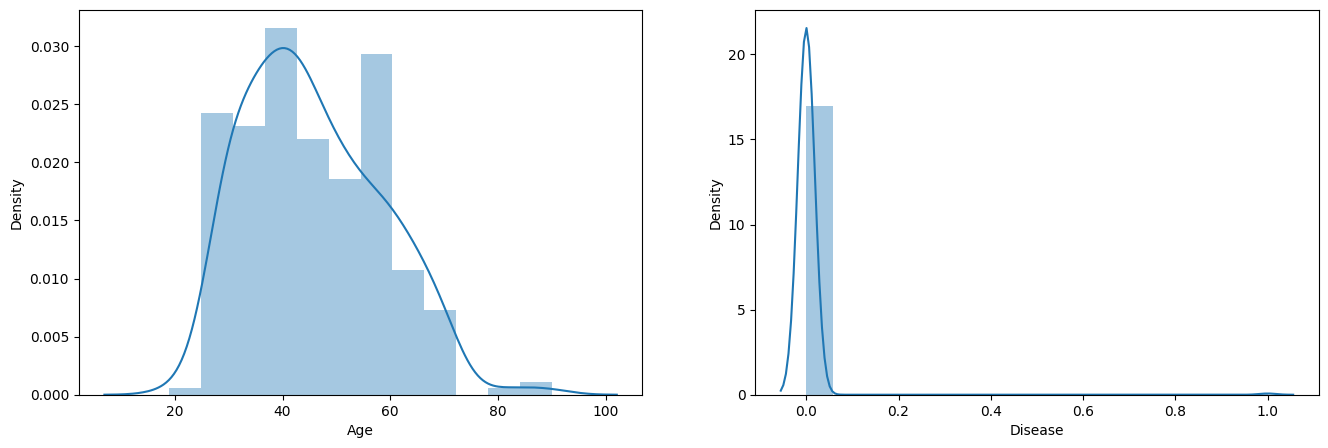

In [305]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['Age'])
# Age having normal/uniform distribution will apply z-score technique

plt.subplot(1,2,2)
sns.distplot(df4['Disease'])
# Disease having left  skewed 

plt.show()


In [52]:
print("mean value of age",df4['Age'].mean())
print("std value of age",df4['Age'].std())
print("min value of age",df4['Age'].min())
print("max value of age",df4['Age'].max())


mean value of age 45.75666666666667
std value of age 12.596548429232067
min value of age 19
max value of age 90


In [53]:
#Finding the Boundary values

print("Highest allowed",df5['Age'].mean() + 3*df5['Age'].std())
print("Lowest allowed",df5['Age'].mean() - 3*df5['Age'].std())

Highest allowed 83.54631195436286
Lowest allowed 7.967021378970465


In [54]:
# # Finding the outliers
df4[(df4['Age']>83.54)|(df4['Age']<7.96)]

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,OV
345,0.0,1,0,1,0,85,0.0,0.0,0.0,1,1
347,0.0,1,0,1,0,90,1.0,0.0,0.0,1,1


In [307]:
# #Trimming
df4=df4[(df4['Age']<83.54) & (df4['Age']>7.96)]
# df4

In [309]:
# #Approach 2
# #Calculating the Z-score 
df4['Age_zscore']=(df4['Age']-df3['Age'].mean())/df4['Age'].std()
# df4

In [313]:
a=df4[df4['Age_zscore']>3]
b=df4[df4['Age_zscore']<-3]

In [316]:
# # Capping
upper_limit = df5['Age'].mean() +3*df5['Age'].std()
lower_limit =df5['Age'].mean()-3*df5['Age'].std()

In [317]:
upper_limit
lower_limit

7.967021378970465

In [318]:
df5['Age']=np.where(
    df5['Age']>upper_limit,
    upper_limit,
    np.where(
        df5['Age']<lower_limit,
        lower_limit,
        df5['Age']
    )
)

In [320]:
df5['Age'].describe()

count    300.000000
mean      45.730309
std       12.511083
min       19.000000
25%       35.000000
50%       45.000000
75%       55.000000
max       83.546312
Name: Age, dtype: float64

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(df5.iloc[:,0:9],df5.iloc[:,-1], test_size=0.2, random_state=2)
# df5
# np.round(X_train.describe(),1)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
count,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0
mean,0.0,0.5,0.5,0.7,0.2,45.6,0.5,1.0,1.0
std,0.1,0.5,0.5,0.5,0.4,12.8,0.5,1.0,0.9
min,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0,0.0,45.0,1.0,1.0,1.0
75%,0.0,1.0,1.0,1.0,0.0,55.0,1.0,2.0,2.0
max,1.0,1.0,1.0,1.0,1.0,90.0,1.0,2.0,2.0


In [213]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the paramters
scaler.fit(X_train)
# transform train and  test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

# np.round(X_train_scaled.describe(),1)


In [152]:
clf1 =LogisticRegression()
clf2= DecisionTreeClassifier()

In [198]:
clf1.fit(X_train_scaled,y_train)
# clf2.fit(X_train,y_train)

LogisticRegression()

In [199]:
y_pred1=clf1.predict(X_test_scaled)
y_pred2=clf2.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Dicision Trees", accuracy_score(y_test,y_pred2))

NameError: name 'y_pred1' is not defined

In [51]:
confusion_matrix(y_test,y_pred2)

NameError: name 'confusion_matrix' is not defined

In [ ]:
# Precision,Recall,F1_score

In [202]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [203]:
print("For Logistic regression model")
print("-"*50)
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score -",f1_score(y_test,y_pred1))

For Logistic regression model
--------------------------------------------------
    0   1
0  12  13
1  14  21
--------------------------------------------------
precision -  0.6176470588235294
Recall -  0.6
F1 score - 0.608695652173913


In [206]:
print("For DT model")
print("-"*50)
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("precision - ",precision_score(y_test,y_pred2))
print("Recall - ",recall_score(y_test,y_pred2))
print("F1 score -",f1_score(y_test,y_pred2))

For DT model
--------------------------------------------------
    0   1
0  19   6
1  10  25
--------------------------------------------------
precision -  0.8064516129032258
Recall -  0.7142857142857143
F1 score - 0.7575757575757576


In [205]:
# Logistic Regression
X=df4.iloc[:,0:10].values
y=df4.iloc[:,-10].values


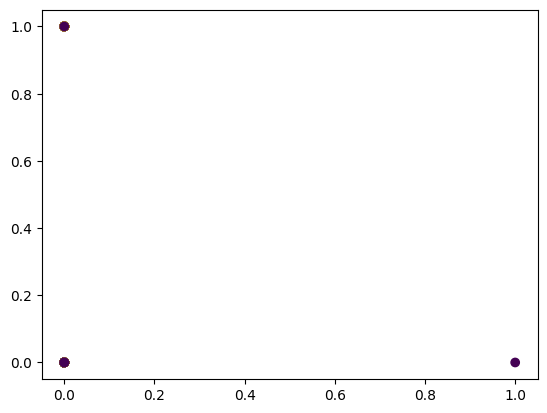

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [90]:
clf.fit(X,y)

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(X,y,clf=clf,legend=2)

In [93]:
 from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [94]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy', cv=10))

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

1.0

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_trf = poly.fit_transform(X)

In [96]:
clf3= LogisticRegression()
np.mean(cross_val_score(clf3, X_trf, y, scoring='accuracy', cv=10))

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

1.0

In [97]:
# Hyper-parameter Tuning using GridSearchCV
X=df4.iloc[:,0:10].values
y=df4.iloc[:,-10].values


In [98]:
# Values are not scaled use standardScaler operation

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [99]:
X=scaler.fit_transform(X)

In [100]:
X

array([[-0.05802589,  1.05521333, -0.94131607, ...,  0.00692394,
         1.08322826,  0.96051062],
       [-0.05802589, -0.94767567,  1.06234243, ...,  1.03859091,
         1.08322826, -1.04111291],
       [-0.05802589, -0.94767567,  1.06234243, ...,  1.03859091,
         1.08322826, -1.04111291],
       ...,
       [-0.05802589,  1.05521333,  1.06234243, ..., -1.02474303,
        -1.02658887,  0.96051062],
       [-0.05802589, -0.94767567, -0.94131607, ...,  1.03859091,
         1.08322826,  0.96051062],
       [-0.05802589,  1.05521333, -0.94131607, ..., -1.02474303,
        -1.02658887,  0.96051062]])

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [102]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [103]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [104]:
y_pred=clf.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test,y_pred)

1.0

In [107]:
# python dictionary, two paramter is we have Max_depth and criterion, gini is index
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [108]:
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(clf,param_grid=param_dist, cv=10, n_jobs=-1)

In [109]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [50]:
# now we will search whether are work done correct or not, with the help of attribute will derive the info, what the best accuracy that model will get it
grid.best_estimator_

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ord_en',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'High'],
                                                                             ['Low',
                                                                              'Normal',
                                                                              'High']]),
                                                  [7, 8])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_all',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 4, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x000001C918DF5D00>)),
                ('trf5', DecisionTreeClassifier(max_depth=1))])

In [111]:
grid.best_score_

1.0

In [112]:
grid.best_params_


{'criterion': 'gini', 'max_depth': 1}

In [114]:
# K-Nearest Neighbors algo
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df5.iloc[:,0:9],df5.iloc[:,-1],test_size=0.2, random_state=2)


In [113]:
X_train.shape

(238, 10)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)

In [117]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [118]:
from sklearn.metrics import accuracy_score

y_pred=knn.predict(X_test)

accuracy_score(y_test,y_pred)

0.6833333333333333

In [119]:
scores =[]

for i in range(1,16):
    knn= KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

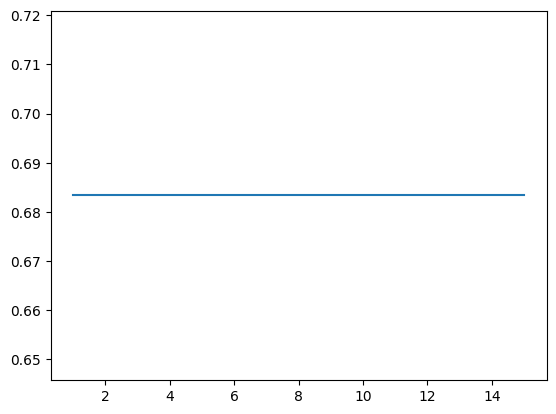

In [120]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),scores)

In [29]:

from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(df5.iloc[:,0:9],df5.iloc[:,-1],test_size=0.2, random_state=2)


In [135]:
# model improvement

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)

In [31]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [32]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [33]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.5833333333333334
[[ 0 25]
 [ 0 35]]
0.5833333333333334


In [34]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.5666666666666667
[[12 13]
 [13 22]]
0.6285714285714286


In [35]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.5833333333333334
[[12 13]
 [12 23]]
0.6388888888888888


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [37]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators =50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [39]:
clfs = {
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb': xgb
}

In [40]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)


    return accuracy,precision

In [41]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.5833333333333334, 0.5833333333333334)

In [42]:
accuracy_scores=[]
precision_scores=[]

for name ,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For", name)
    print("Accuracy ", current_accuracy)
    print("Precision ", current_precision)

    accuracy_scores.append(current_accuracy)
    accuracy_scores.append(current_precision)

For SVC
Accuracy  0.5833333333333334
Precision  0.5833333333333334
For KN
Accuracy  0.55
Precision  0.625
For NB
Accuracy  0.5666666666666667
Precision  0.6285714285714286
For DT
Accuracy  0.65
Precision  0.7333333333333333
For LR
Accuracy  0.55
Precision  0.625
For RF
Accuracy  0.6833333333333333
Precision  0.7666666666666667
For AdaBoost
Accuracy  0.5833333333333334
Precision  0.6666666666666666
For BgC
Accuracy  0.7166666666666667
Precision  0.7647058823529411
For ETC
Accuracy  0.7
Precision  0.7741935483870968
For GBDT
Accuracy  0.6333333333333333
Precision  0.7407407407407407
For xgb
Accuracy  0.7
Precision  0.7575757575757576


In [43]:
# Voting classifier
# svc =SVC(kernel='sigmoid', gamma=1.0, probability=True)
# mnb= MultinomialNB()
# etc=ExtraTreeClassifier()

# from sklearn.ensemble import VotingClassifier

Text(0.5, 1.0, 'Feature 2')

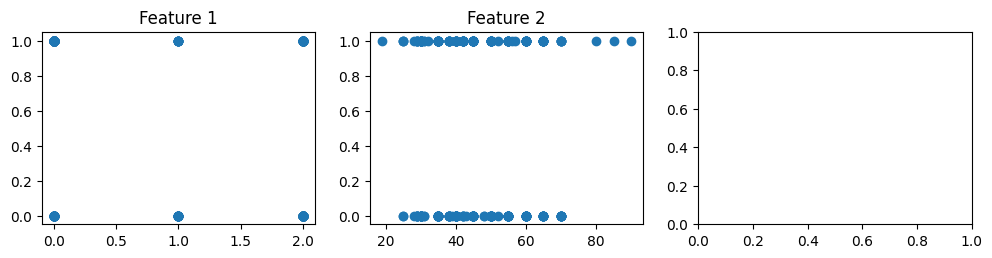

In [44]:

# multicollinearity
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df5['Cholesterol Level'], df5['Outcome Variable'])
ax1.set_title("Feature 1")
ax2.scatter(df5['Age'], df5['Fever'])
ax2.set_title("Feature 2")

<Axes: >

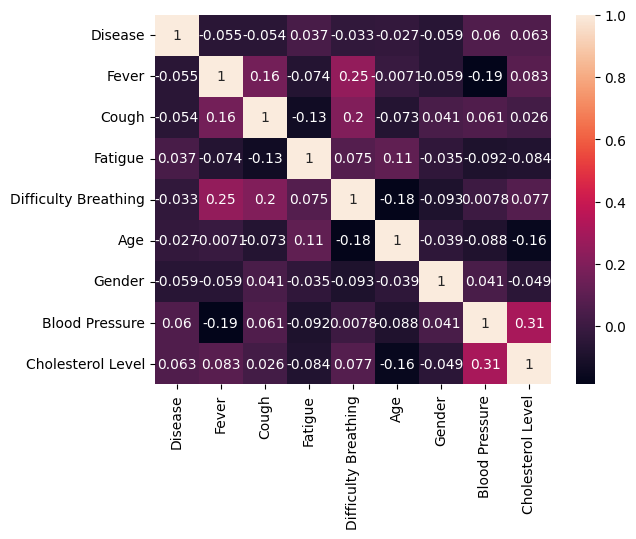

In [139]:
# multicollinearity
sns.heatmap(df5.iloc[:,0:9].corr(), annot=True)

In [20]:
import pandas as pd
ct = pd.crosstab(df5['Outcome Variable'],df5['Gender'],margins=True)
ct

Gender,0.0,1.0,All
Outcome Variable,,,
0,87,56,143
1,61,96,157
All,148,152,300


In [21]:
# Feature selecction Chi-square test
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=14.47206696955272, pvalue=0.0059312836044641245, dof=4, expected_freq=array([[ 70.54666667,  72.45333333, 143.        ],
       [ 77.45333333,  79.54666667, 157.        ],
       [148.        , 152.        , 300.        ]]))

In [22]:
score = []

for feature in df5.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(df5['Outcome Variable'], df5[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

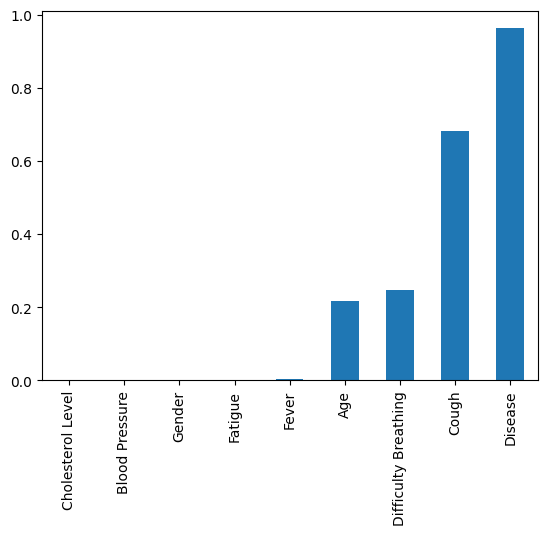

In [23]:
pd.Series(score, index=df5.columns[:-1]).sort_values(ascending=True).plot(kind='bar')